# Linear regression
Using PyTorch to perform linear regression.
An official introduction to the PyTorch library can be found here: https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

## Linear regression - Manual implementation in PyTorch
In the below example we see a 1D linear regression example: $y=wx+b$

In [2]:
x = torch.tensor(range(-5,5)).float()
x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [3]:
w_gt = 3
b_gt = 4
y = w_gt*x + b_gt
y

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

In [4]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(f'w: {w}')
print(f'b: {b}')

w: tensor([0.1253], requires_grad=True)
b: tensor([0.0209], requires_grad=True)


Try out with different learning rate.
What happens if learning rate $0.1$ is used?

In [6]:
learning_rate = 0.01

In [8]:
def trainManual(w, b, lr, iternum):
    for i in range(iternum):
        y_hat = w*x + b

        error = torch.sum(torch.pow(y-y_hat,2)/y.numel())
        error.backward()   # Compute the Gradients for w and b (requires_grad=True)
        print(w,w.grad)
        # Update parameters
        with torch.no_grad():   # Temporarily set all requires_grad=False
            w -= lr * w.grad
            b -= lr * b.grad
            # Remember to zero the gradients!
            # If not, the gradients will be accumulated
            w.grad.zero_()
            b.grad.zero_()
        print("Error: {:.4f}".format(error))

In [44]:
trainManual(w, b, learning_rate, 10)
y_pred = (w*x + b)
y_pred = y_pred.data.numpy()
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(w[0] ,b[0]))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

tensor([2.9997], requires_grad=True) tensor([-0.0006])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0006])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9997], requires_grad=True) tensor([-0.0005])
Error: 0.0000
tensor([2.9998], requires_grad=True) tensor([-0.0005])
Error: 0.0000
----- ----- ----- ----- -----
Prediction:
w_pred = 3.00, b_pred = 4.00
Ground-truth:
w_gt = 3.00, b_gt = 4.00


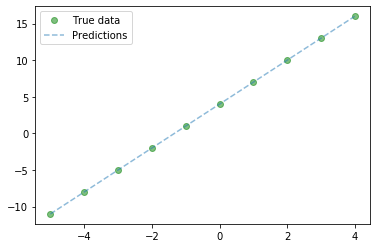

In [45]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Linear regression - Using the torch.nn.Module
In the below example we see a 1D linear regression example: $y=wx+b$

In [46]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [56]:
class LinearRegression(torch.nn.Module): 
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [57]:
our_model = LinearRegression()

In [58]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01) 

In [59]:
def trainBuildIn(model, x, y, iter):
    for i in range(iter):
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        
        # get output from the model, given the inputs
        y_pred = model(x)

        # get loss for the predicted output
        loss = criterion(y_pred, y)
        print(loss)
        # get gradients w.r.t to parameters
        loss.backward()

        # update parameters
        optimizer.step()

        print('Iter {}, loss {}'.format(iter, loss.item()))

In [79]:
x_train = x[:,None]
y_train = y[:,None]

print(x_train.shape)
print(y_train.shape)

trainBuildIn(our_model, x_train, y_train, 10)

y_pred_bi = our_model(x_train).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

torch.Size([10, 1])
torch.Size([10, 1])
tensor(0.0074, grad_fn=<MseLossBackward>)
Iter 10, loss 0.0074289278127253056
tensor(0.0071, grad_fn=<MseLossBackward>)
Iter 10, loss 0.007144417613744736
tensor(0.0069, grad_fn=<MseLossBackward>)
Iter 10, loss 0.006870814599096775
tensor(0.0066, grad_fn=<MseLossBackward>)
Iter 10, loss 0.006607669405639172
tensor(0.0064, grad_fn=<MseLossBackward>)
Iter 10, loss 0.006354617420583963
tensor(0.0061, grad_fn=<MseLossBackward>)
Iter 10, loss 0.006111252121627331
tensor(0.0059, grad_fn=<MseLossBackward>)
Iter 10, loss 0.005877167917788029
tensor(0.0057, grad_fn=<MseLossBackward>)
Iter 10, loss 0.005652112886309624
tensor(0.0054, grad_fn=<MseLossBackward>)
Iter 10, loss 0.005435626953840256
tensor(0.0052, grad_fn=<MseLossBackward>)
Iter 10, loss 0.005227458197623491
----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[2.9952]])
linear.bias tensor([3.9280])
Ground-truth:
w_gt = 3.00, b_gt = 4.00


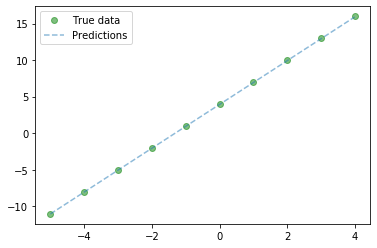

In [80]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# Validation with SKLEARN
Using "Ordinary least squares Linear Regression".


In [81]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x[:,None], y[:,None])
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(float(linr.intercept_), float(linr.coef_[0])))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt ,b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 4.00, b_pred = 3.00
Ground-truth:
w_gt = 3.00, b_gt = 4.00
